In [1]:
import importlib

import training
importlib.reload(training)
import graph_vis
importlib.reload(graph_vis)
import graph_creation
importlib.reload(graph_creation)
import utils
importlib.reload(utils)
import train_n2v
importlib.reload(train_n2v)

import networkx as nx


Using device: cpu
Random seed set to: 42
p_values: [1, 2]
q_values: [1, 2]
Using device: cpu
Random seed set to: 42
p_values: [1, 2]
q_values: [1, 2]



----------Basic graph information-----------
Type:  <class 'networkx.classes.graph.Graph'>
Graph with 100 nodes and 290 edges
Number of nodes:  100
Number of edges:  290
Average node degree:  5.8
Has isolated nodes:  0
Has self loops:  0
Is directed:  False
----------Graph extra statistics-----------
Number of connected components: 1
Number of nodes in largest component: 100
Average Clustering Coefficient: 0.359891581904134
Transitivity/Global clustering coeff: 0.1805940594059406
Average Shortest Path (Largest Component): 2.6624242424242426
Number of Connected Components: 1

Node labels:  {0: 5, 1: 2, 2: 4, 3: 1, 4: 5, 5: 3, 6: 5, 7: 5, 8: 6, 9: 0, 10: 6, 11: 0, 12: 0, 13: 5, 14: 5, 15: 0, 16: 2, 17: 5, 18: 4, 19: 0, 20: 1, 21: 0, 22: 0, 23: 1, 24: 5, 25: 6, 26: 3, 27: 4, 28: 0, 29: 2, 30: 6, 31: 0, 32: 2, 33: 2, 34: 2, 35: 2, 36: 6, 37: 6, 38: 0, 39: 5, 40: 0, 41: 5, 42: 2, 43: 0, 44: 2, 45: 2, 46: 2, 47: 1, 48: 1, 49: 1, 50: 0, 51: 6, 52: 5, 53: 6, 54: 2, 55: 1, 56: 4, 57: 3, 58: 4,

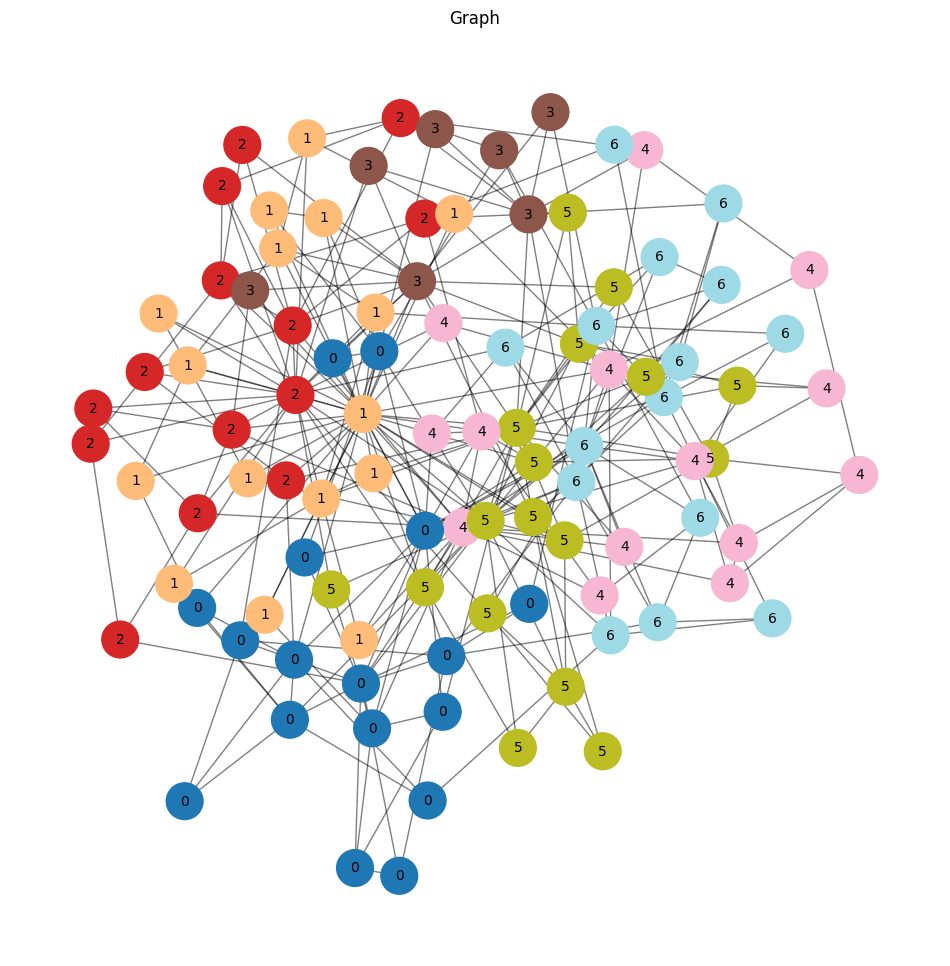

Node type information available for histogram.
    node_type  count
0          0     17
1          1     16
2          2     14
3          3      7
4          4     14
5          5     17
6          6     15


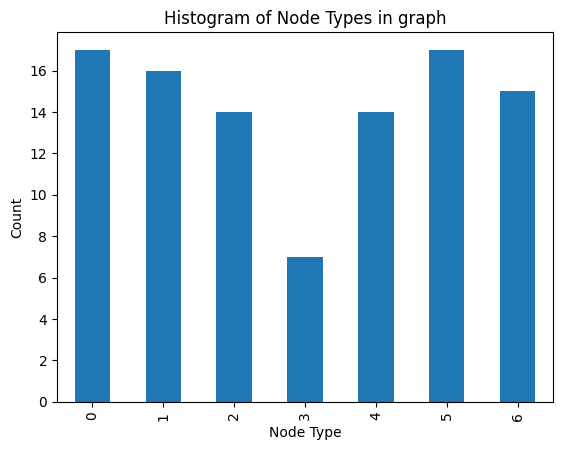

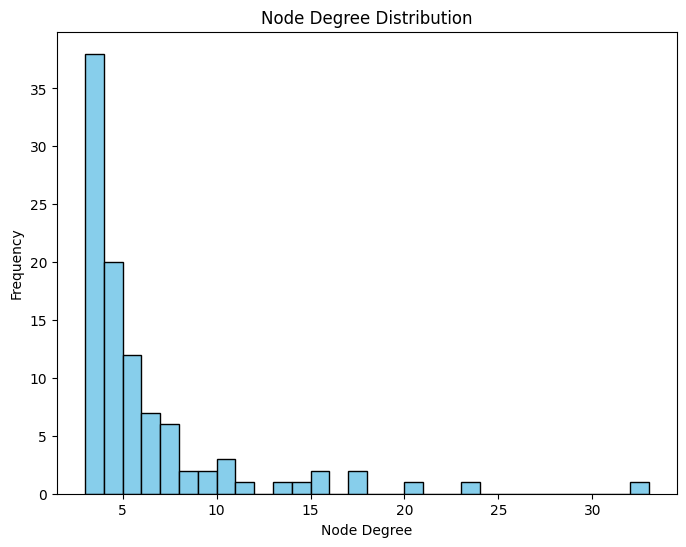

In [2]:
# https://networkx.org/documentation/stable/reference/generators.html#module-networkx.generators.community

# graph_hierarchy = graph_creation.graph_with_hierarchy_generator(2, 10, False,print_text=False) # 2, 10
# graph_vis.print_graph_info_cluster(graph_hierarchy)

# graph_hierarchy = graph_creation.create_hierarchical_graph_new(branching_factors=[2,3,2,3], noise_edges=0)
# 8,5,3,3,2
# graph_hierarchy = nx.random_powerlaw_tree(1000,3, seed = 42, tries = 10000)
graph_hierarchy = utils.add_louvain_community_labels(nx.powerlaw_cluster_graph(100, 3, 0.5, seed=42))

# for this we need the greedy labeling

graph_vis.print_graph_info_cluster(graph_hierarchy)

graph_vis.graph_visualizer(graph_hierarchy, layout='spring')

data_hierarchy = utils.nx_to_pytorch_data_converter(graph_hierarchy)
graph_vis.pyg_graph_data_visualizer(data_hierarchy)


----------Basic graph information-----------
Type:  <class 'networkx.classes.graph.Graph'>
Graph named 'stochastic_block_model' with 50 nodes and 127 edges
Graph creation function:  graph_with_communities_generator_sb
Number of nodes:  50
Number of edges:  127
Average node degree:  5.08
Has isolated nodes:  0
Has self loops:  0
Is directed:  False
----------Graph extra statistics-----------
Number of connected components: 1
Number of nodes in largest component: 50
Average Clustering Coefficient: 0.3898571428571429
Transitivity/Global clustering coeff: 0.4017857142857143
Average Shortest Path (Largest Component): 3.466938775510204
Number of Connected Components: 1


----------Basic graph information-----------
Type:  <class 'networkx.classes.graph.Graph'>
Graph named 'stochastic_block_model' with 50 nodes and 127 edges
Graph creation function:  graph_with_communities_generator_sb
Number of nodes:  50
Number of edges:  127
Average node degree:  5.08
Has isolated nodes:  0
Has self loops

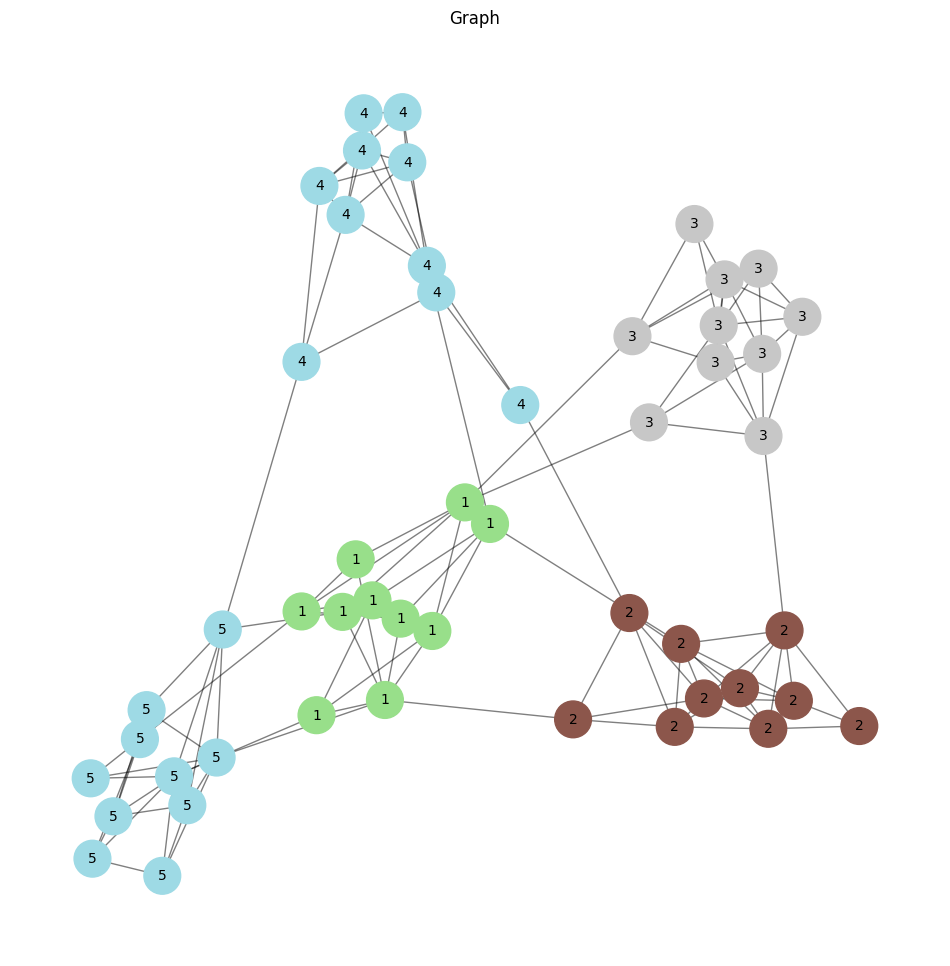

Node type information available for histogram.
    node_type  count
0          1     10
1          2     10
2          3     10
3          4     10
4          5     10


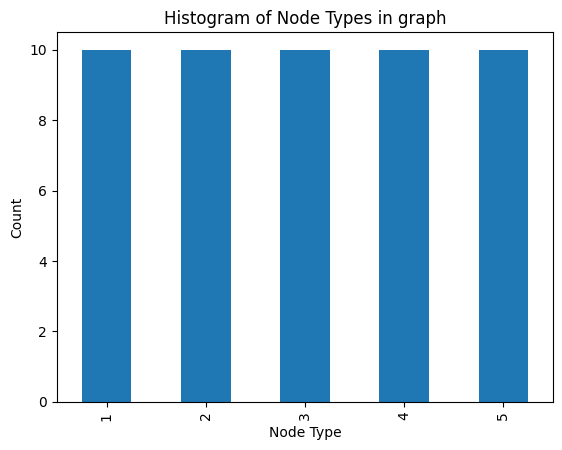

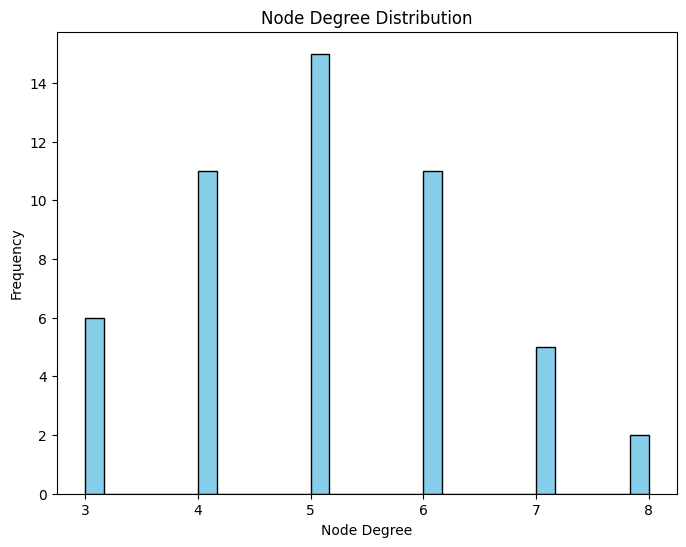

In [3]:
graph_community = graph_creation.graph_with_communities_generator_sb(5,10, print_text=False)# 15,80
graph_vis.print_graph_info_cluster(graph_community)

graph_vis.print_graph_info_cluster(graph_community)

graph_vis.graph_visualizer(graph_community, layout='spring')

data_hierarchy = utils.nx_to_pytorch_data_converter(graph_community)
graph_vis.pyg_graph_data_visualizer(data_hierarchy)

In [4]:
# graph_vis.graph_visualizer(graph_community, layout='spring')
# graph_vis.graph_visualizer(graph_hierarchy, layout='bfs')


Node type information available for histogram.
    node_type  count
0          0     17
1          1     16
2          2     14
3          3      7
4          4     14
5          5     17
6          6     15


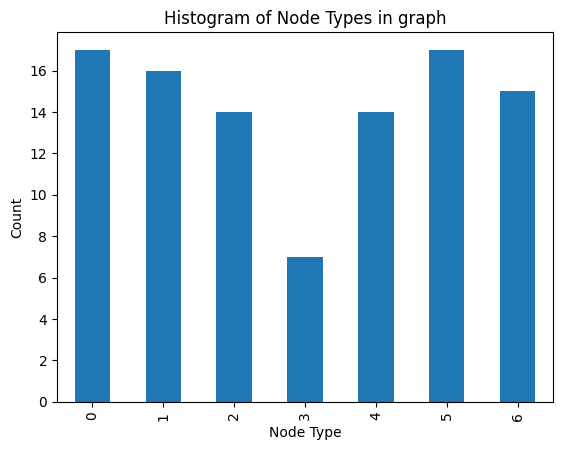

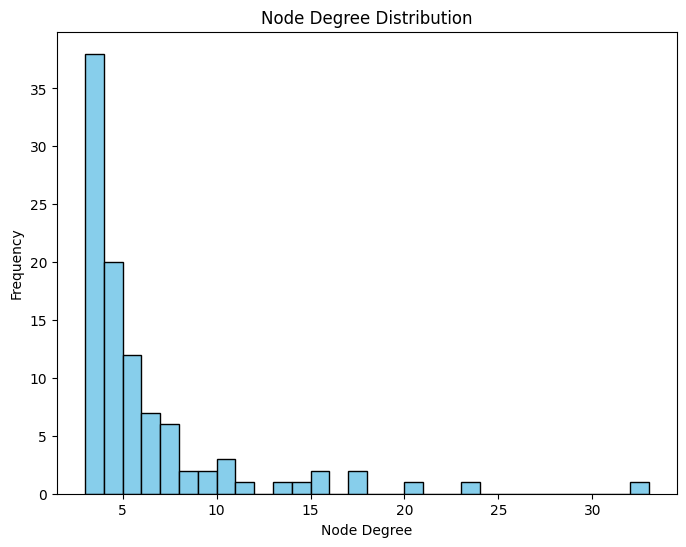

In [5]:
data_community = utils.nx_to_pytorch_data_converter(graph_community)
data_hierarchy = utils.nx_to_pytorch_data_converter(graph_hierarchy)

graph_vis.pyg_graph_data_visualizer(data_hierarchy)


In [6]:
# data = graph_lib.create_masks(data_community)
data_h = utils.create_masks(data_hierarchy)
data_c = utils.create_masks(data_community)

data_list=[data_c, data_h]

#TODO
[] make it optional to print all figures, default is only acc
[] on figure: name of dataset and q and p params
[] graph string modify to store creation function info for printing

how do i make p and q changable?

[x] grap info printout: redundant text off, make it more readable


Running with p=1_q=2 = {'embedding_dim': 128, 'walk_length': 70, 'context_size': 14, 'walks_per_node': 18, 'num_negative_samples': 1, 'sparse': True, 'p': 1, 'q': 2}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 8 epochs...


Epoch: 001, Loss: 10.3951, Acc: 0.0667, Duration: 6.54s
Dataset name: graph_with_communities_generator_sb
    New best model saved with accuracy: 0.0667


Epoch: 002, Loss: 10.0208, Acc: 0.0667, Duration: 4.37s


Epoch: 003, Loss: 9.6376, Acc: 0.1333, Duration: 3.38s
Dataset name: graph_with_communities_generator_sb
    New best model saved with accuracy: 0.1333


Epoch: 004, Loss: 9.2739, Acc: 0.1333, Duration: 4.76s


Epoch: 005, Loss: 8.9361, Acc: 0.1333, Duration: 5.43s


Epoch: 006, Loss: 8.5870, Acc: 0.2000, Duration: 3.83s
Dataset name: graph_with_communities_generator_sb
    New best model saved with accuracy: 0.2000


Epoch: 007, Loss: 8.2276, Acc: 0.2000, Duration: 3.38s


Epoch: 008, Loss: 7.9285, Acc: 0.2000, Duration: 3.06s

Training finished.
Total elapsed time: 34.77 seconds
Best test accuracy: 0.2000
Best model state saved to './training_data/models/'


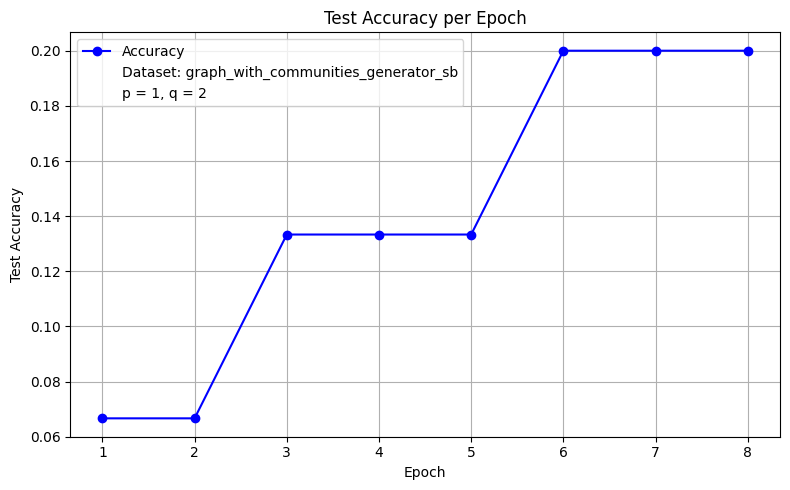

Running with p=2_q=1 = {'embedding_dim': 128, 'walk_length': 70, 'context_size': 14, 'walks_per_node': 18, 'num_negative_samples': 1, 'sparse': True, 'p': 2, 'q': 1}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 8 epochs...


Epoch: 001, Loss: 9.6256, Acc: 0.3333, Duration: 4.21s
Dataset name: graph_with_communities_generator_sb
    New best model saved with accuracy: 0.3333


Epoch: 002, Loss: 9.2726, Acc: 0.3333, Duration: 4.80s


Epoch: 003, Loss: 8.8399, Acc: 0.3333, Duration: 3.47s


Epoch: 004, Loss: 8.4853, Acc: 0.3333, Duration: 3.85s


Epoch: 005, Loss: 8.1478, Acc: 0.3333, Duration: 3.49s


Epoch: 006, Loss: 7.8440, Acc: 0.3333, Duration: 2.96s


Epoch: 007, Loss: 7.5463, Acc: 0.3333, Duration: 3.17s


Epoch: 008, Loss: 7.1903, Acc: 0.3333, Duration: 3.00s

Training finished.
Total elapsed time: 28.96 seconds
Best test accuracy: 0.3333
Best model state saved to './training_data/models/'


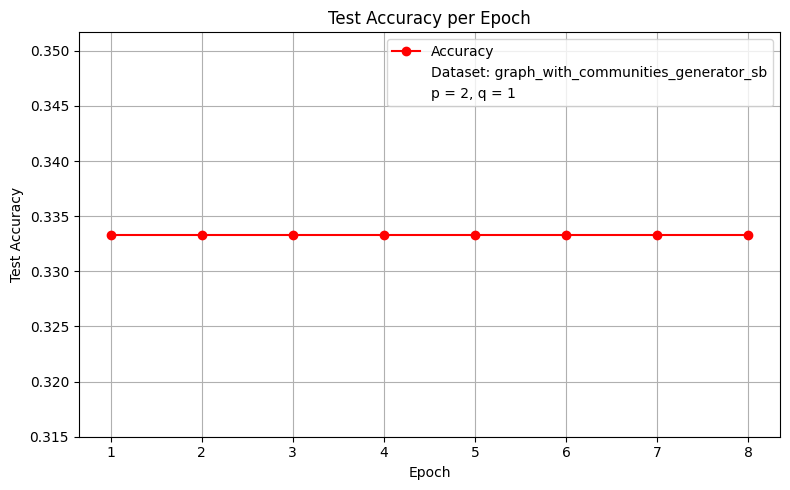

Running with p=1_q=2 = {'embedding_dim': 128, 'walk_length': 70, 'context_size': 14, 'walks_per_node': 18, 'num_negative_samples': 1, 'sparse': True, 'p': 1, 'q': 2}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 8 epochs...


Epoch: 001, Loss: 10.2979, Acc: 0.2000, Duration: 11.15s
Dataset name: Unknown
    New best model saved with accuracy: 0.2000


Epoch: 002, Loss: 10.0309, Acc: 0.2667, Duration: 10.01s
Dataset name: Unknown
    New best model saved with accuracy: 0.2667


Epoch: 003, Loss: 9.7462, Acc: 0.2667, Duration: 16.47s


Epoch: 004, Loss: 9.4320, Acc: 0.2667, Duration: 11.20s


Epoch: 005, Loss: 9.1692, Acc: 0.2667, Duration: 9.99s


Epoch: 006, Loss: 8.9131, Acc: 0.2667, Duration: 9.16s


Epoch: 007, Loss: 8.6783, Acc: 0.2667, Duration: 9.86s


Epoch: 008, Loss: 8.4173, Acc: 0.2667, Duration: 7.40s

Training finished.
Total elapsed time: 85.26 seconds
Best test accuracy: 0.2667
Best model state saved to './training_data/models/'


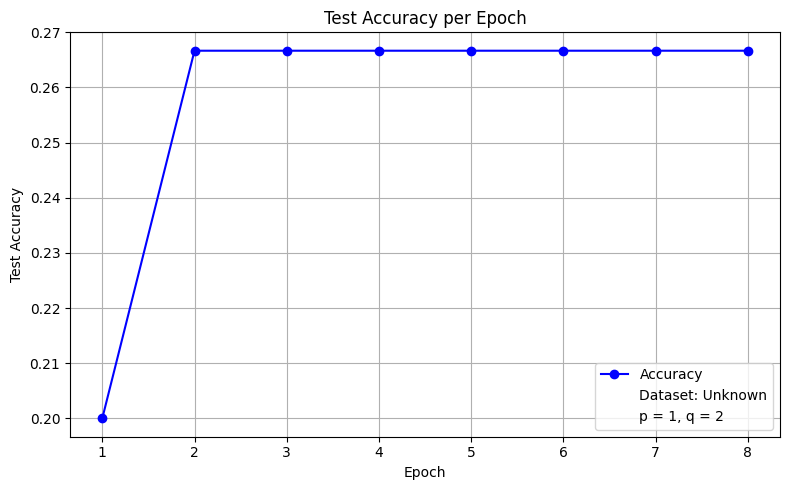

Running with p=2_q=1 = {'embedding_dim': 128, 'walk_length': 70, 'context_size': 14, 'walks_per_node': 18, 'num_negative_samples': 1, 'sparse': True, 'p': 2, 'q': 1}
Model initialization parameters provided as dictionary.
Model initialized
Starting training for 8 epochs...


Epoch: 001, Loss: 10.1132, Acc: 0.2000, Duration: 8.33s
Dataset name: Unknown
    New best model saved with accuracy: 0.2000


Epoch: 002, Loss: 9.8223, Acc: 0.2000, Duration: 33.49s


Epoch: 003, Loss: 9.5980, Acc: 0.2000, Duration: 23.87s


Epoch: 004, Loss: 9.3244, Acc: 0.2000, Duration: 32.69s


Epoch: 005, Loss: 9.0633, Acc: 0.2000, Duration: 36.34s


Epoch: 006, Loss: 8.7567, Acc: 0.2000, Duration: 32.38s


Epoch: 007, Loss: 8.5605, Acc: 0.2000, Duration: 11.52s


Epoch: 008, Loss: 8.3193, Acc: 0.2000, Duration: 16.32s

Training finished.
Total elapsed time: 194.96 seconds
Best test accuracy: 0.2000
Best model state saved to './training_data/models/'


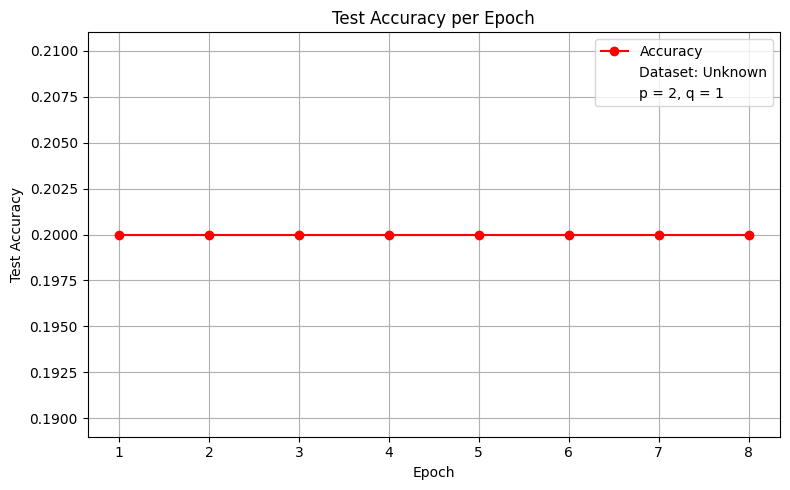

In [7]:
train_n2v.train_node2vecs(data_list, 8)